# HW2 of Python与金融分析
***
## 一、（数据清洗）（50分）
房地产投资信托(Real Estate Investment Trust, 缩写为REIT)， 由美国国会于1960年创造，主要是借由不动产的证券化及许多投资人的资金集资，使没有庞大资本的一般投资人也能以较低门槛参与不动产市场，获得不动产市场交易、租金与增值所带来的获利。同时投资人又不需要实质持有不动产标的，并可在证券市场交易，因此市场流通性优于不动产（以上为科普内容，不了解不影响作答）。<br>
请在本次作业附件中找到名为“REITs_2013-2019.xlsx”的表格文件，其包含两个表格页：”CLOSE_PRICE”和”VOLUME”，分别包括了从2013年1月初至2019年12月底的51只REIT的每日收盘价和交易量，请编写Python的pandas模块读取该表格然后完成以下数据清洗任务：<br>
基于原始数据，批量式生成一系列”.csv”文件，文件名各自为：“REITs名称”+”.csv”，例如对于“ABP AU Equity”这只REIT，生成对应的文件“ABP AU Equity.csv”，文件具体要求如下：<br>

- i) 文件共有三列，列名分别为“日期”，“收盘价”，“成交量” （为达成此部分可以考虑将不同表格页的数据读取出来，注意表头并不在第一行，然后利用循环语句提取出每个REITs对应的收盘价和成交量，再运用已有知识进行数据框的合并）；<br>

- ii) 需要运用课堂上的知识，判断并对原始数据的缺失值进行填补（注意收盘价和成交量的填补方式不同）；<br>

- iii) 如果一只REIT的价格数据全部为空，则不需要输出该REIT的文件。<br>

> 此部分作业要求：
> 报告：写出生成的文件数目（该数目应该小于51）;
> 代码：给出进行数据清洗、生成以上文件的代码。

In [1]:
import pandas as pd

ABP_price = pd.read_excel('REITs_2013-2019.xlsx', sheet_name = 'RAW_LAST').iloc[11: , [0, 1]]
ABP_volume = pd.read_excel('REITs_2013-2019.xlsx', sheet_name = 'VOLUME').iloc[11: , [0, 1]]

In [2]:
ABP_price.head(), ABP_volume.head()

(             Start Year 2013-01-01 00:00:00
 11  2013-01-01 00:00:00                 NaN
 12  2013-01-02 00:00:00                 2.2
 13  2013-01-03 00:00:00                2.18
 14  2013-01-04 00:00:00                2.18
 15  2013-01-05 00:00:00                 NaN,
              Start Year 2013-01-01 00:00:00
 11  2013-01-01 00:00:00                 NaN
 12  2013-01-02 00:00:00       181147.759044
 13  2013-01-03 00:00:00       223322.608333
 14  2013-01-04 00:00:00       203015.716057
 15  2013-01-05 00:00:00                 NaN)

本题的话，本人就只做一列数据啦

In [3]:
ABP_price['Start Year'] = pd.to_datetime(ABP_price['Start Year'])

In [4]:
ABP_price.set_index('Start Year', inplace = True)

In [5]:
ABP_price.columns = ['Close Price']

In [6]:
# repeat it to 'volume'

ABP_volume['Start Year'] = pd.to_datetime(ABP_volume['Start Year'])
ABP_volume.set_index('Start Year', inplace = True)
ABP_volume.columns = ['Volume']

In [7]:
# We suddenly find that Volume has a row of NaN, 
# which is meaningless enough for us to decide to clear it up

ABP_volume = ABP_volume.iloc[:-1]


Through it, we manage to get rid of the NaN row.
We use the method:
```python
ABP_volume.iloc[:-1]
```
It just perfectly satisfies my need!

In [8]:
ABP_volume.tail()


,Volume
Start Year,
2019-12-02,801372
2019-12-03,1416929
2019-12-04,1725870
2019-12-05,1068355
2019-12-06,1039113


In [9]:
# prepare for the csv

ABP = {'日期': ABP_price.index,
       '收盘价': ABP_price['Close Price'],
       '成交量': ABP_volume['Volume']}

ABP = pd.DataFrame(ABP)
ABP.reset_index(drop = True, inplace = True)
ABP

,日期,收盘价,成交量
0,2013-01-01,NaN,NaN
1,2013-01-02,2.2,181147.759044
2,2013-01-03,2.18,223322.608333
3,2013-01-04,2.18,203015.716057
4,2013-01-05,NaN,NaN
...,...,...,...
2526,2019-12-02,3.87,801372
2527,2019-12-03,3.79,1416929
2528,2019-12-04,3.74,1725870
2529,2019-12-05,3.77,1068355


然而...  
这并不能满足我们对几十个股票进行汇总的需求  
尽管如此，我们有了基本思路：
$$
\text{循环 i in range(...)->}\text{读取->}\text{合并 pd.merge() ->}\text{输出}
$$


In [10]:
reits_path = 'D:\A-Python与金融分析\REITs_2013-2019.xlsx'
df_price = pd.read_excel(reits_path, sheet_name = 'RAW_LAST', index_col= 'Start Year').iloc[9:, ]
df_volume = pd.read_excel(reits_path, sheet_name = 'VOLUME', index_col= 'Start Year').iloc[9:-1, ]

In [11]:
df_price.columns = df_price.iloc[0]
df_price = df_price.iloc[2:]

In [12]:
df_volume.columns = df_volume.iloc[0]
df_volume = df_volume.iloc[2:]

In [13]:
df_price

nan,ABP AU Equity,ADI AU Equity,AEZ AU Equity,AGJ AU Equity,AHO AU Equity,AJA AU Equity,AJD AU Equity,ALZ AU Equity,ANI AU Equity,AOF AU Equity,...,FST AU Equity,GDFDA AU Equity,GDI AU Equity,GHC AU Equity,GJT AU Equity,GMF AU Equity,GMG AU Equity,GOZ AU Equity,GPT AU Equity,HPI AU Equity
Start Year,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 00:00:00,2.2,NaN,NaN,NaN,NaN,3,NaN,3.4,NaN,NaN,...,1.85,NaN,NaN,0.99,0.76,NaN,4.42,2.21,3.74,NaN
2013-01-03 00:00:00,2.18,NaN,NaN,NaN,NaN,3,NaN,3.39,NaN,NaN,...,NaN,NaN,NaN,0.99,NaN,NaN,4.34,2.23,3.67,NaN
2013-01-04 00:00:00,2.18,NaN,NaN,NaN,NaN,3,NaN,3.33,NaN,NaN,...,NaN,NaN,NaN,0.99,NaN,NaN,4.37,2.22,3.67,NaN
2013-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02 00:00:00,3.87,2.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.87,...,NaN,NaN,1.54,NaN,NaN,NaN,14.85,4.38,6.16,3.28
2019-12-03 00:00:00,3.79,2.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.86,...,NaN,NaN,1.535,NaN,NaN,NaN,14.39,4.35,6.01,3.27
2019-12-04 00:00:00,3.74,2.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.86,...,NaN,NaN,1.52,NaN,NaN,NaN,14.24,4.31,5.96,3.26


In [14]:
df_volume

nan,ABP AU Equity,ADI AU Equity,AEZ AU Equity,AGJ AU Equity,AHO AU Equity,AJA AU Equity,AJD AU Equity,ALZ AU Equity,ANI AU Equity,AOF AU Equity,...,FST AU Equity,GDFDA AU Equity,GDI AU Equity,GHC AU Equity,GJT AU Equity,GMF AU Equity,GMG AU Equity,GOZ AU Equity,GPT AU Equity,HPI AU Equity
Start Year,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 00:00:00,181147.759044,NaN,NaN,NaN,NaN,56347,NaN,516449,NaN,NaN,...,145000,NaN,NaN,2.084166,6578,NaN,3813107,61644.603575,4001640,NaN
2013-01-03 00:00:00,223322.608333,NaN,NaN,NaN,NaN,17716,NaN,470815,NaN,NaN,...,NaN,NaN,NaN,33540.485289,NaN,NaN,2425929,52318.813976,3801026,NaN
2013-01-04 00:00:00,203015.716057,NaN,NaN,NaN,NaN,10136,NaN,591879,NaN,NaN,...,NaN,NaN,NaN,21291.841031,NaN,NaN,4415150,50473.506781,2958453,NaN
2013-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02 00:00:00,801372,799846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105640,...,NaN,NaN,496572,NaN,NaN,NaN,4022838,835417,4036852,665752
2019-12-03 00:00:00,1416929,958880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133375,...,NaN,NaN,761251,NaN,NaN,NaN,5473762,1187269,7120413,615360
2019-12-04 00:00:00,1725870,250510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125226,...,NaN,NaN,743989,NaN,NaN,NaN,6154173,1486262,8191808,475026


现在我们得到了正式可用的两个列表，接下来就是循环生成文件了
$$\text{“日期”，“收盘价”，“成交量”}$$

In [15]:
reits_dictionary = {}
for reit in df_price.columns:
    reits_dictionary[str(reit)] = df_price[[reit]].merge(df_volume[[reit]], 
                                                         left_index = True, 
                                                         right_index = True)
    reits_dictionary[str(reit)].reset_index(drop = False, inplace = True)
    reits_dictionary[str(reit)].columns = ['日期','收盘价', '成交量']

In [16]:
reits_dictionary['ABP AU Equity']

,日期,收盘价,成交量
0,2013-01-01,NaN,NaN
1,2013-01-02,2.2,181147.759044
2,2013-01-03,2.18,223322.608333
3,2013-01-04,2.18,203015.716057
4,2013-01-05,NaN,NaN
...,...,...,...
2526,2019-12-02,3.87,801372
2527,2019-12-03,3.79,1416929
2528,2019-12-04,3.74,1725870
2529,2019-12-05,3.77,1068355


现在我们得到了一个字典，字典的键为REITs的名称，字典的值为REITs的DataFrame。

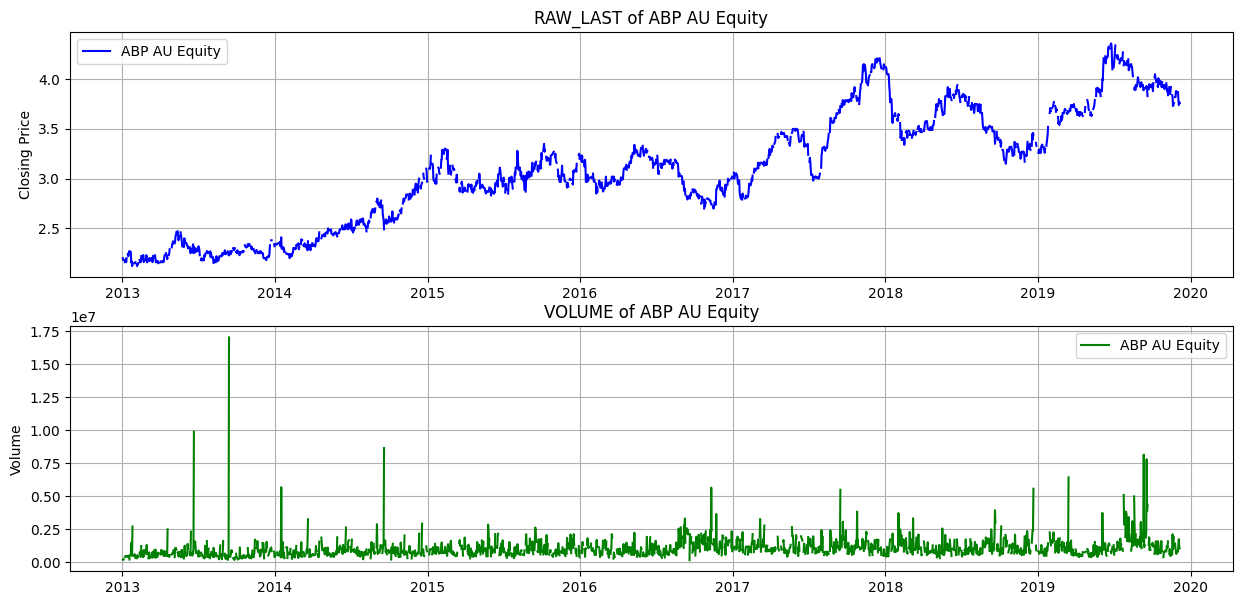

In [17]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] 
 
plt.style.use('default')

fig1 = plt.figure(figsize = (15, 7))
axe1 = fig1.add_subplot(211)
axe2 = fig1.add_subplot(212)

axe1.plot(reits_dictionary['ABP AU Equity']['日期'], 
         reits_dictionary['ABP AU Equity']['收盘价'], 
         label = 'ABP AU Equity', color= 'blue')

axe2.plot(reits_dictionary['ABP AU Equity']['日期'], 
         reits_dictionary['ABP AU Equity']['成交量'], 
         label = 'ABP AU Equity', color= 'green')

axe1.grid(); axe2.grid()
axe1.set_title('RAW_LAST of '+'ABP AU Equity'); axe2.set_title('VOLUME of '+'ABP AU Equity')
axe1.set_ylabel('Closing Price'); axe2.set_ylabel('Volume')
axe1.legend(); axe2.legend()
plt.show()

In [18]:
reits_dictionary['ABP AU Equity']['收盘价'].fillna(method= 'pad')
# 还剩第一个
reits_dictionary['ABP AU Equity']['收盘价'].iloc[0] = reits_dictionary['ABP AU Equity']['收盘价'].iloc[1]

C:\Users\杉嶋桐惠\AppData\Local\Temp\ipykernel_6736\3212319610.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  reits_dictionary['ABP AU Equity']['收盘价'].fillna(method= 'pad')
C:\Users\杉嶋桐惠\AppData\Local\Temp\ipykernel_6736\3212319610.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reits_dictionary['ABP AU Equity']['收盘价'].fillna(method= 'pad')
C:\Users\杉嶋桐惠\AppData\Local\Temp\ipykernel_6736\3212319610.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to upd

## 二、（数据可视化）（50分）
请采用tushare或tushare pro读取申万宏源(000166.SZ)与贵州茅台(600519.SH)在2024年1月1日至2024年7月1日之间的日K线数据，请检查数据有无缺失（如有则进行填补，否则仅保留检查的代码即可），假定你是一名投资顾问，需要向客户讲解两只股票的走势情况，进行绘图，要求展示如下图片：<br>
- 1）两只指数的K线图，要求按照我国市场的颜色风格绘制（上涨为红色，下跌为绿色），添加5日和20日均线、成交量图；
  
- 2）为了进一步提高对指数走势预判精确度，引入布林带(Bollinger band)这一技术分析常用工具，由上轨线与下轨线构成：
	> 布林带上轨线 = N个交易日收盘价的移动平均值 + 2xN个交易日收盘价的标准差<br>
    > 布林带下轨线 = N个交易日收盘价的移动平均值 - 2xN个交易日收盘价的标准差

    在一幅图片中引入两个子图，分别对应两只股票，绘制两只股票的如下折线：<br>
    收盘价，N = 20的布林带上轨线和布林带下轨线，要求两个子图共享x轴，横坐标为日期，纵坐标为价格（中英文均可）；

- 3）分别计算两只股票的日收益率，基于此绘制散点图，计算两只股票日收益率的相关系数。
报告：给出K线图2幅，包含两个子图的折线图1幅，散点图1幅；
代码：给出绘制图片、定义和计算各数据框的代码。

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

我们使用tushare获取股票数据<br>
这个工具在使用时需要去tushare官网实时获取刷新过的最新个人接口(token)，否则会寄<br>
下面是如何接入token的一个示范<br>

In [20]:
import tushare as ts

ts.set_token('251624ebd8ce6534da92c287e3db586b7c54ec71b92cd34468a81042')
pro = ts.pro_api()

df_SWHY = pro.daily(ts_code= '000166.SZ', start_date= '20240101', end_date= '20240701')
df_GZMT = pro.daily(ts_code= '600519.SH', start_date= '20240101', end_date= '20240701')

In [21]:
df_SWHY.set_index('trade_date', inplace=True)
df_GZMT.set_index('trade_date', inplace=True)

In [22]:
df_SWHY

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20240701,000166.SZ,4.31,4.34,4.24,4.32,4.31,0.01,0.2320,557575.38,240039.117
20240628,000166.SZ,4.39,4.43,4.29,4.31,4.40,-0.09,-2.0455,860324.88,375462.550
20240627,000166.SZ,4.41,4.44,4.38,4.40,4.41,-0.01,-0.2268,463282.84,204267.191
20240626,000166.SZ,4.33,4.42,4.33,4.41,4.33,0.08,1.8476,557087.31,244119.139
20240625,000166.SZ,4.41,4.42,4.33,4.33,4.40,-0.07,-1.5909,582353.44,254322.710
...,...,...,...,...,...,...,...,...,...,...
20240108,000166.SZ,4.36,4.36,4.25,4.26,4.37,-0.11,-2.5172,613648.95,263262.114
20240105,000166.SZ,4.35,4.45,4.33,4.37,4.34,0.03,0.6912,719905.24,316500.289
20240104,000166.SZ,4.37,4.38,4.32,4.34,4.38,-0.04,-0.9132,414283.00,179980.099


In [23]:
df_GZMT

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20240701,600519.SH,1468.88,1472.99,1428.00,1440.38,1467.39,-27.01,-1.8407,32161.38,4636689.118
20240628,600519.SH,1480.00,1494.49,1464.00,1467.39,1490.49,-23.10,-1.5498,38582.02,5699649.047
20240627,600519.SH,1492.00,1493.97,1468.00,1490.49,1489.22,1.27,0.0853,32821.78,4857959.457
20240626,600519.SH,1480.00,1501.07,1477.80,1489.22,1486.65,2.57,0.1729,29569.77,4414601.922
20240625,600519.SH,1477.00,1502.99,1477.00,1486.65,1476.55,10.10,0.6840,42097.95,6273919.386
...,...,...,...,...,...,...,...,...,...,...
20240108,600519.SH,1661.00,1662.00,1640.01,1643.99,1663.36,-19.37,-1.1645,25586.20,4211918.629
20240105,600519.SH,1661.33,1678.66,1652.11,1663.36,1669.00,-5.64,-0.3379,20242.86,3373155.627
20240104,600519.SH,1693.00,1693.00,1662.93,1669.00,1694.00,-25.00,-1.4758,21551.07,3603970.147


In [24]:
df_SWHY.index = pd.to_datetime(df_SWHY.index)
df_GZMT.index = pd.to_datetime(df_GZMT.index)

In [25]:
df_SWHY.index.rename('Date',inplace= True)
df_SWHY

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
Date,,,,,,,,,,
2024-07-01,000166.SZ,4.31,4.34,4.24,4.32,4.31,0.01,0.2320,557575.38,240039.117
2024-06-28,000166.SZ,4.39,4.43,4.29,4.31,4.40,-0.09,-2.0455,860324.88,375462.550
2024-06-27,000166.SZ,4.41,4.44,4.38,4.40,4.41,-0.01,-0.2268,463282.84,204267.191
2024-06-26,000166.SZ,4.33,4.42,4.33,4.41,4.33,0.08,1.8476,557087.31,244119.139
2024-06-25,000166.SZ,4.41,4.42,4.33,4.33,4.40,-0.07,-1.5909,582353.44,254322.710
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,000166.SZ,4.36,4.36,4.25,4.26,4.37,-0.11,-2.5172,613648.95,263262.114
2024-01-05,000166.SZ,4.35,4.45,4.33,4.37,4.34,0.03,0.6912,719905.24,316500.289
2024-01-04,000166.SZ,4.37,4.38,4.32,4.34,4.38,-0.04,-0.9132,414283.00,179980.099


In [26]:
df_GZMT.index.rename('Date',inplace= True)
df_GZMT

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
Date,,,,,,,,,,
2024-07-01,600519.SH,1468.88,1472.99,1428.00,1440.38,1467.39,-27.01,-1.8407,32161.38,4636689.118
2024-06-28,600519.SH,1480.00,1494.49,1464.00,1467.39,1490.49,-23.10,-1.5498,38582.02,5699649.047
2024-06-27,600519.SH,1492.00,1493.97,1468.00,1490.49,1489.22,1.27,0.0853,32821.78,4857959.457
2024-06-26,600519.SH,1480.00,1501.07,1477.80,1489.22,1486.65,2.57,0.1729,29569.77,4414601.922
2024-06-25,600519.SH,1477.00,1502.99,1477.00,1486.65,1476.55,10.10,0.6840,42097.95,6273919.386
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,600519.SH,1661.00,1662.00,1640.01,1643.99,1663.36,-19.37,-1.1645,25586.20,4211918.629
2024-01-05,600519.SH,1661.33,1678.66,1652.11,1663.36,1669.00,-5.64,-0.3379,20242.86,3373155.627
2024-01-04,600519.SH,1693.00,1693.00,1662.93,1669.00,1694.00,-25.00,-1.4758,21551.07,3603970.147


为了绘制K线图，我们特别下载了matplotlib.pyplot之外的mpl_finance

In [27]:
import mplfinance as mpf

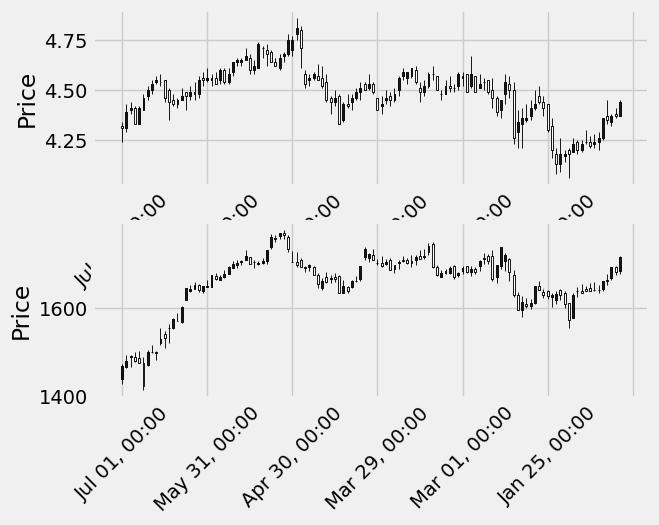

In [35]:
fig_K = plt.figure()
ax_K1 = fig_K.add_subplot(211)
ax_K2 = fig_K.add_subplot(212)

plt.style.use('fivethirtyeight')

mpf.plot(df_SWHY, type= 'candle', ax= ax_K1)
mpf.plot(df_GZMT, type= 'candle', ax= ax_K2)
plt.grid(True)
